In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# import dataset

In [3]:
data = pd.read_csv("Liverpool_players_season2016-2017_2021-2022.csv")
# print size of data
print(data.shape)
# show first 10 rows
data.head(10)


(2652, 19)


,Unnamed: 0,Player,shirt_number,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks
0,0,Diogo Jota,20,POR,FW,24-253,60,1,0,0,0,2,2,0,0,22,1,0,0
1,1,Roberto Firmino,9,BRA,FW,29-316,30,1,0,0,0,1,1,0,0,17,1,0,1
2,2,Sadio Mané,10,SEN,LW,29-126,90,0,0,0,0,3,0,0,0,45,1,0,1
3,3,Mohamed Salah,11,EGY,RW,29-060,90,1,2,0,0,5,2,0,0,35,0,0,0
4,4,Naby Keïta,8,GUI,"LM,RM",26-185,82,0,0,0,0,0,0,0,0,52,6,0,2
5,5,Harvey Elliott,67,ENG,RM,18-132,8,0,0,0,0,0,0,0,0,7,0,0,0
6,6,James Milner,7,ENG,"CM,LM",35-222,90,0,0,0,0,0,0,1,0,81,3,2,2
7,7,Alex Oxlade-Chamberlain,15,ENG,RM,27-364,60,0,0,0,0,2,0,0,0,28,0,1,1
8,8,Fabinho,3,BRA,CM,27-295,30,0,0,0,0,0,0,0,0,25,0,0,2
9,9,Kostas Tsimikas,21,GRE,LB,25-094,90,0,0,0,0,2,1,0,0,77,3,0,1


# data preprocessing and cleaning

In [4]:
# remove irrelevant variables
data = data.drop(["shirt_number"], axis=1) 
# remove first column
data = data.iloc[:,1:]
# convert Age to numeric
data["Age"] = data["Age"].str[:2].astype(int)
# remove any rows with missing data
data = data.dropna() 
# Split the strings in the "Pos" column by comma and keep only the first position listed
data["Pos"] = data["Pos"].str.split(",", n=1, expand=True)[0]
# show first 10 rows
data.head(10)

,Player,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks
0,Diogo Jota,POR,FW,24,60,1,0,0,0,2,2,0,0,22,1,0,0
1,Roberto Firmino,BRA,FW,29,30,1,0,0,0,1,1,0,0,17,1,0,1
2,Sadio Mané,SEN,LW,29,90,0,0,0,0,3,0,0,0,45,1,0,1
3,Mohamed Salah,EGY,RW,29,90,1,2,0,0,5,2,0,0,35,0,0,0
4,Naby Keïta,GUI,LM,26,82,0,0,0,0,0,0,0,0,52,6,0,2
5,Harvey Elliott,ENG,RM,18,8,0,0,0,0,0,0,0,0,7,0,0,0
6,James Milner,ENG,CM,35,90,0,0,0,0,0,0,1,0,81,3,2,2
7,Alex Oxlade-Chamberlain,ENG,RM,27,60,0,0,0,0,2,0,0,0,28,0,1,1
8,Fabinho,BRA,CM,27,30,0,0,0,0,0,0,0,0,25,0,0,2
9,Kostas Tsimikas,GRE,LB,25,90,0,0,0,0,2,1,0,0,77,3,0,1


# performace extraction

In [5]:
data["ScoringContribution"] = data["Gls"] + data["Ast"]
data["DefensiveContribution"] = data["Tkl"] + data["Int"] + data["Blocks"]
data.sample(10)

,Player,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,ScoringContribution,DefensiveContribution
1088,Andrew Robertson,SCO,LB,25,90,0,0,0,0,3,0,0,0,95,3,1,0,0,4
498,Joël Matip,CMR,CB,30,90,1,0,0,0,2,2,0,0,60,1,2,0,1,3
383,James Milner,ENG,RM,36,5,0,0,0,0,0,0,0,0,6,0,0,0,0,0
1762,Fabinho,BRA,CM,25,5,0,0,0,0,0,0,0,0,6,1,0,0,0,1
1312,Andrew Robertson,SCO,LB,25,90,0,0,0,0,0,0,0,0,78,3,2,1,0,6
1530,Andrew Robertson,SCO,LB,26,45,0,1,0,0,0,0,0,0,56,1,0,0,1,1
863,Divock Origi,BEL,FW,25,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1181,Joe Gomez,ENG,RB,22,6,0,0,0,0,0,0,0,0,5,0,1,0,0,1
2099,Georginio Wijnaldum,NED,LM,28,65,0,0,0,0,0,0,0,0,55,1,0,0,0,1
305,Roberto Firmino,BRA,FW,30,59,0,0,0,0,4,2,1,0,43,3,0,1,0,4


# inferential statistics

## Are there any statistically significant differences in the performance of Liverpool's players based on their age, position, or other demographic factors?


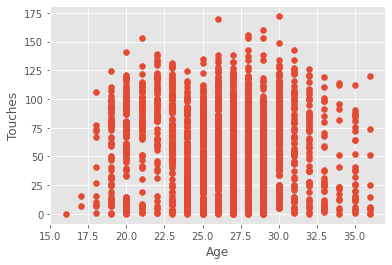

Correlation coefficient: -0.07
p-value: 0.0004


In [10]:
import scipy.stats as stats
# is there a significant relationship between age and performance (number of time player touch the ball)?
plt.scatter(data["Age"], data["Touches"])
plt.xlabel("Age")
plt.ylabel("Touches")
plt.show()

# apply Pearson's correlation test
corr, p = stats.pearsonr(data["Age"], data["Touches"])
print("Correlation coefficient: {:.2f}".format(corr))
print("p-value: {:.4f}".format(p))


* As p-value is less than 0.05, we reject the null hypothesis and conclude that there is a difference in the performance of Liverpool's players based on their age. correlation coefficient is -0.07, which is a weak negtive correlation.

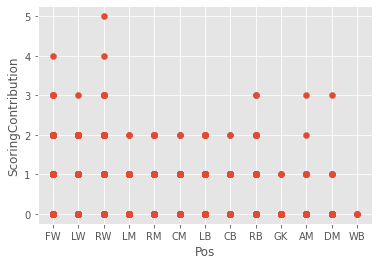

F-statistic: 28.99412014893821
P-value: 7.973389594111192e-63


In [29]:
# is there a significant relationship between position of the player and ScoringContribution (goals + assists)?
plt.scatter(data["Pos"], data["ScoringContribution"])
# sort the plot if categorical Pos variable has ScoringContribution more so sort the plot

plt.xlabel("Pos")
plt.ylabel("ScoringContribution")
plt.show()

# Grouping the data by position and converting the ScoringContribution column into a list
grouped_data = data.groupby('Pos')['ScoringContribution'].apply(list)

# Performing one-way ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)

# Printing the results
print("F-statistic:", f_stat)
print("P-value:", p_value)

* As p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the scoring performance of Liverpool's players based on their position.

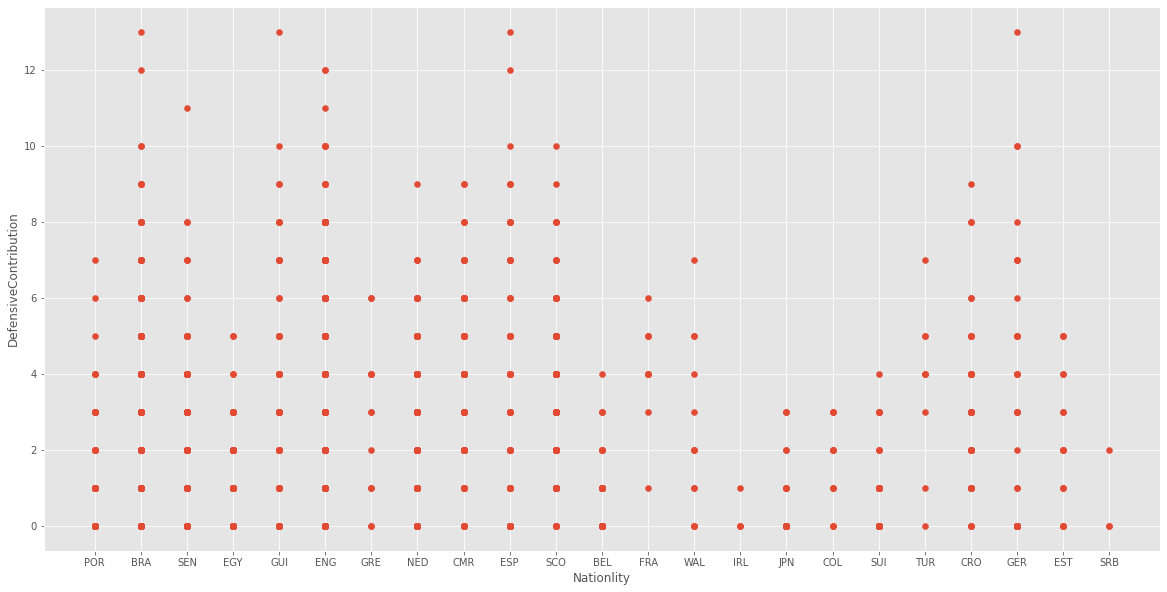

F-statistic: 15.773095658872547
P-value: 3.6417423805008323e-56


In [32]:
# is there a significant relationship between Nationlity of the player and DefensiveContribution?
plt.scatter(data["Nation"], data["DefensiveContribution"])
# increase the size of the plot
plt.rcParams['figure.figsize'] = [20, 10]
plt.xlabel("Nationlity")
plt.ylabel("DefensiveContribution")
plt.show()

# Grouping the data by Nationlity and converting the DefensiveContribution column into a list
grouped_data = data.groupby('Nation')['DefensiveContribution'].apply(list)

# Performing one-way ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)

# Printing the results
print("F-statistic:", f_stat)
print("P-value:", p_value)

* As p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the defensive performance of Liverpool's players based on their nationlity.

# exprolratory data analysis

### How does the number of touches a player has correlate with their defensive contributions (such as tackles, interceptions, or blocks)?

Correlation between touches and tackles: 0.34011197278624267 , p-value: 7.151036611178172e-30
Correlation between touches and interceptions: 0.41123145958044394 , p-value: 3.763378730420436e-44
Correlation between touches and blocks: 0.22911251645565542 , p-value: 5.5186014194772106e-14


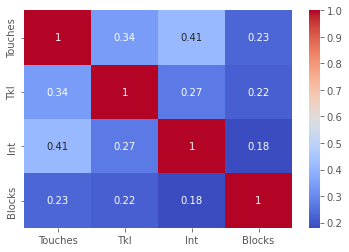

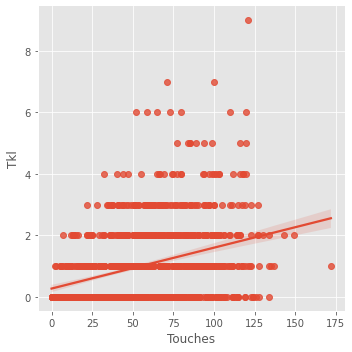

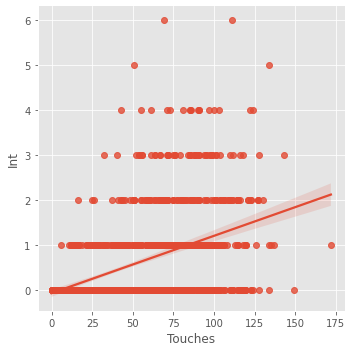

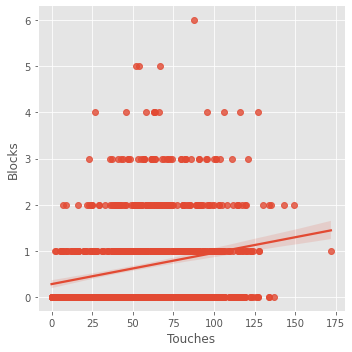

In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix between touches, tackles, interceptions, and blocks
corr_matrix = data[['Touches', 'Tkl', 'Int', 'Blocks']].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Create scatterplots and regression lines for each defensive metric
sns.lmplot(x='Touches', y='Tkl', data=data)
sns.lmplot(x='Touches', y='Int', data=data)
sns.lmplot(x='Touches', y='Blocks', data=data)

# Calculate the correlation coefficient and p-value between touches and each defensive metric
corr_tkl, pval_tkl = stats.pearsonr(data['Touches'], data['Tkl'])
corr_int, pval_int = stats.pearsonr(data['Touches'], data['Int'])
corr_blocks, pval_blocks = stats.pearsonr(data['Touches'], data['Blocks'])

# Print the correlation coefficients and p-values
print('Correlation between touches and tackles:', corr_tkl, ', p-value:', pval_tkl)
print('Correlation between touches and interceptions:', corr_int, ', p-value:', pval_int)
print('Correlation between touches and blocks:', corr_blocks, ', p-value:', pval_blocks)


* The correlation coefficient between touches and tackles is 0.34, indicating a moderate positive correlation.
* The correlation coefficient between touches and interceptions is 0.41, indicating a moderate positive correlation.
* The correlation coefficient between touches and blocks is 0.23, indicating a weak positive correlation.

* All three correlation coefficients are statistically significant, as indicated by the very small p-values (less than 0.05). This means that the observed correlations are unlikely to have occurred by chance.

## In summary, this suggests that players who are more involved in the game, as measured by their number of touches, tend to also make more defensive contributions, such as tackles, interceptions, and blocks. However, it's important to note that correlation does not imply causation, and there could be other factors that influence both the number of touches a player has and their defensive contributions.